In [1]:
import jax
jax.config.update('jax_num_cpu_devices', 1)
jax.config.update("jax_enable_x64", True)
print(jax.devices())

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Import the module
import aurel
from aurel.solutions import Schwarzschild_isotropic as sol

[CpuDevice(id=0)]


In [2]:
L = 10
nt = 0.0
NRerror = []
NKerror = []
NNerror = []
allN = [32, 64, 96, 128, 144, 192]
for N in allN:
    print(" *** N = ", N)
    dx = 2*L / N
    param = { 'Nx': N, 'Ny': N, 'Nz': N, 
            'xmin': -L+0.01, 'ymin': -L+0.01, 'zmin': -L+0.01, 
            'dx': dx, 'dy': dx, 'dz': dx}
    fd = aurel.FiniteDifference(param, fd_order=8)
    rel = aurel.AurelCore(fd)
    rel.data = sol.data(nt, fd.x, fd.y, fd.z)
    rel.freeze_data()
    rel.memory_threshold_inGB = 20

    R_numerical = rel["s_RicciS"]
    Rerror = abs(R_numerical)
    NRerror += [np.nanmedian(fd.excision2(Rerror))]

    K_numerical = rel["Kretschmann"].block_until_ready()
    K_exact = sol.Kretschmann(nt, fd.x, fd.y, fd.z)
    Kerror = abs((K_numerical - K_exact) / K_exact)
    NKerror += [np.nanmedian(fd.excision2(Kerror))]

    N_numerical = rel["null_ray_exp"][0]
    N_exact = sol.null_ray_exp_out(nt, fd.x, fd.y, fd.z)
    Nerror = abs((N_numerical - N_exact) / N_exact)
    NNerror += [np.nanmedian(fd.excision2(Nerror))]
    
    if N != allN[-1]:
        del fd, rel

 *** N =  32
8th order finite difference schemes are defined


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *** N =  64
8th order finite difference schemes are defined


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *** N =  96
8th order finite difference schemes are defined


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *** N =  128
8th order finite difference schemes are defined


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *** N =  144
8th order finite difference schemes are defined


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *** N =  192
8th order finite difference schemes are defined


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Text(0.5, 1.0, '8th order FD with excision')

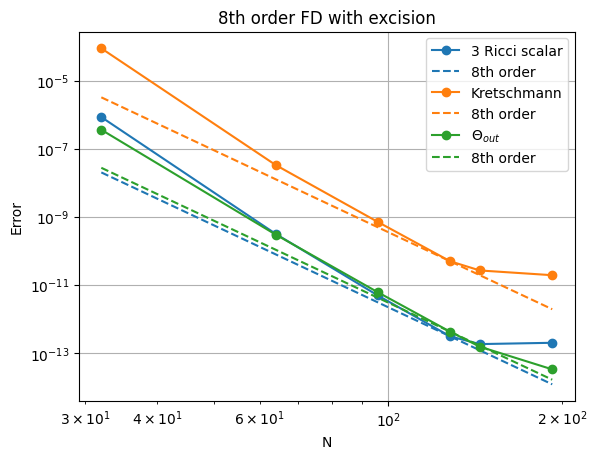

In [3]:
plt.figure()

plt.loglog(allN, NRerror, 'o-', color='C0', label='3 Ricci scalar')
order = 8
ical = -3
converge = [NRerror[ical]*((allN[ical]/allN[i])**(order))for i in range(len(allN))]
plt.loglog(allN, converge, '--', color='C0', label='{}th order'.format(order))

plt.loglog(allN, NKerror, 'o-', color='C1', label='Kretschmann')
order = 8
ical = -3
converge = [NKerror[ical]*((allN[ical]/allN[i])**(order))for i in range(len(allN))]
plt.loglog(allN, converge, '--', color='C1', label='{}th order'.format(order))

plt.loglog(allN, NNerror, 'o-', color='C2', label=r'$\Theta_{out}$')
order = 8
ical = -3
converge = [NNerror[ical]*((allN[ical]/allN[i])**(order))for i in range(len(allN))]
plt.loglog(allN, converge, '--', color='C2', label='{}th order'.format(order))

plt.grid()
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.title('8th order FD with excision')

This shows better than 8th order convergence and a transition from truncation error (from the finite differencing) to floating point noise (from the number of digits stored).